# Работа с предсказаниями цифр, на основе обучающейся модели распознования цифр при помощь нейронных связей

# Инициализация

Установка библиотеки

pip install tensorflow

просмотр списка библиотек

pip list

импортирование библиотек

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
%matplotlib inline

загрузка данных

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

именование будущих классов

In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Предобработка данных

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape, y_test.shape

((60000,), (10000,))

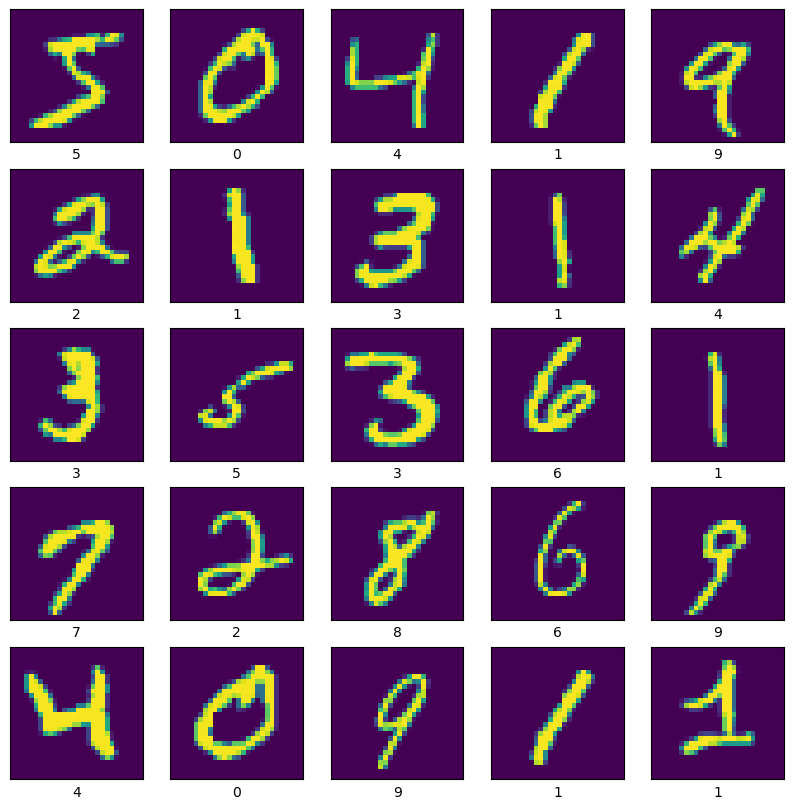

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Нормализация данных

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

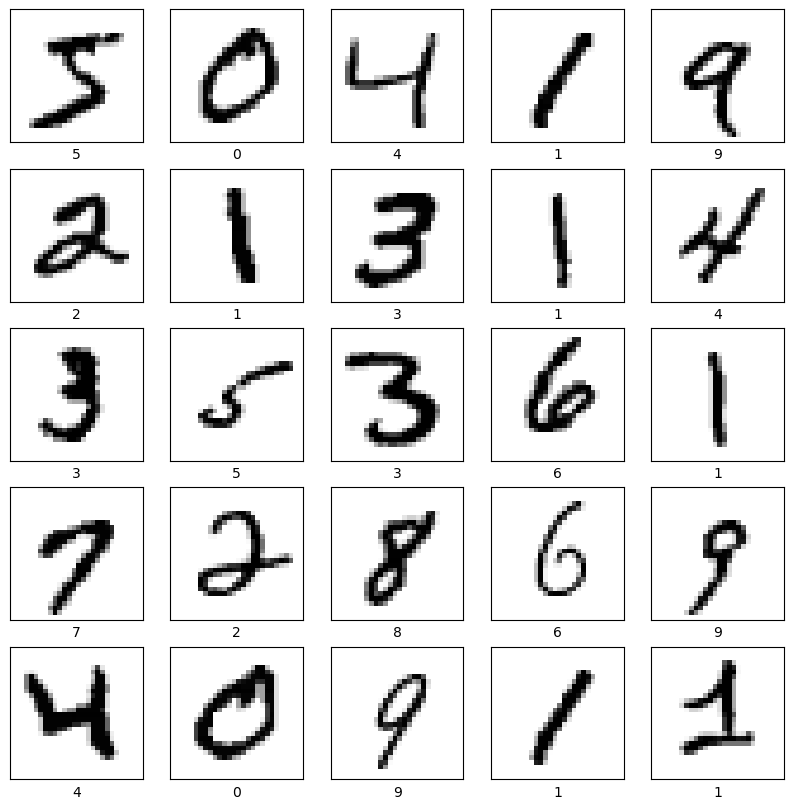

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

# модель нейронных сетей

### Создание модели

In [9]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])

создаем слоистую модель нейронных связей.

4 слоя.

первый flatten провращает картинку в вектор

второй 256 скрытый (добавлен для улучшения предсказания)

третий 128 скрытый

четвертый 10 выходной слой. дает вероятности

In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

компилирует модель при помощи SGD оптимайзера. используем функцию потерь loss и метрица процентная

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### тренировка модели

In [12]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5777 - accuracy: 0.8509
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.9199
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2288 - accuracy: 0.9355
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1940 - accuracy: 0.9448
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1683 - accuracy: 0.9521
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1486 - accuracy: 0.9580
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1329 - accuracy: 0.9620
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1204 - accuracy: 0.9658
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1095 - accuracy: 0.9687
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.100

модель обучилась кажется, что хорошо (аж 97 %), но ниже будет видно, что не очень. 

так же видно, что можно было сотановиться на пяти эпохах.

### проверка точности

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.9645
Test accuracy: 0.9645000100135803


1/1 [==============================] - 0s 68ms/step
Predicted digit: 5
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.01%
Class 4: 0.00%
Class 5: 99.97%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%


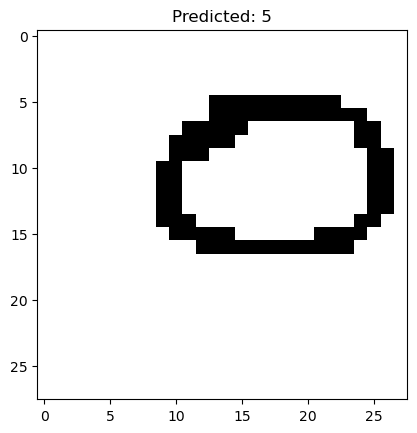

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_zero.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 15ms/step
Predicted digit: 2
Class 0: 0.00%
Class 1: 0.31%
Class 2: 99.38%
Class 3: 0.22%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.01%
Class 7: 0.06%
Class 8: 0.02%
Class 9: 0.00%


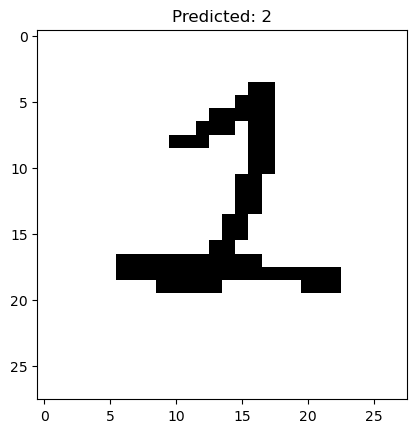

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_one.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 17ms/step
Predicted digit: 2
Class 0: 0.60%
Class 1: 0.03%
Class 2: 95.57%
Class 3: 2.09%
Class 4: 0.00%
Class 5: 0.02%
Class 6: 0.16%
Class 7: 0.00%
Class 8: 1.50%
Class 9: 0.03%


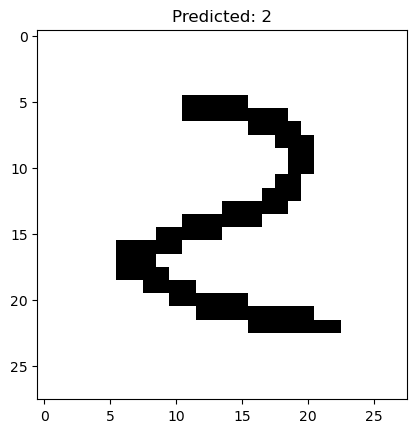

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_two.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 14ms/step
Predicted digit: 3
Class 0: 0.04%
Class 1: 0.18%
Class 2: 7.30%
Class 3: 66.36%
Class 4: 0.08%
Class 5: 1.91%
Class 6: 0.14%
Class 7: 11.77%
Class 8: 1.62%
Class 9: 10.60%


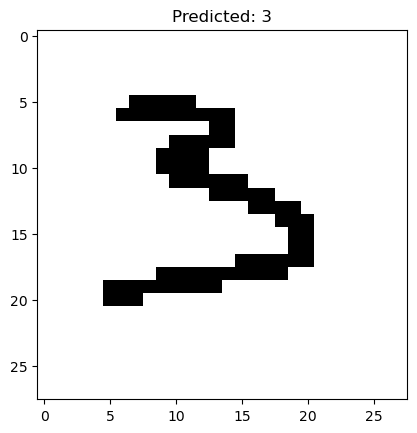

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_three.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 17ms/step
Predicted digit: 8
Class 0: 0.10%
Class 1: 8.48%
Class 2: 1.28%
Class 3: 1.95%
Class 4: 0.16%
Class 5: 1.30%
Class 6: 0.04%
Class 7: 3.01%
Class 8: 66.92%
Class 9: 16.75%


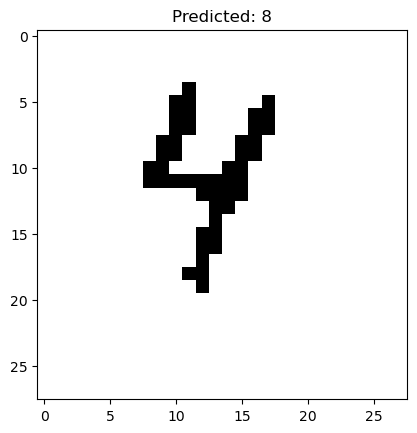

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_four.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


модель угадала только 2, то есть одну картинку.

попробуем по другому сделать

### попытка №2

In [19]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

В этой версии добавлены сверточные слои (Conv2D) и слои подвыборки (MaxPooling2D)

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

здесь применим оптимайзера Адама. он более распространен и универсален

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

используем функцию предотравшения переобучения.

укажем 30 эпох, которые прервутся раньше.

если в течении трех эпох модель не будет улучшаться, то цикл прервется

Если обучение остановлено, веса модели будут восстановлены на момент, когда val_loss был минимален

In [23]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/30
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1247 - accuracy: 0.9608 - val_loss: 0.0407 - val_accuracy: 0.9871
Epoch 2/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0282 - val_accuracy: 0.9906
Epoch 3/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0386 - val_accuracy: 0.9887
Epoch 4/30
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0272 - val_accuracy: 0.9918
Epoch 5/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0356 - val_accuracy: 0.9888
Epoch 6/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0321 - val_accuracy: 0.9917
Epoch 7/30
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0289 -

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0272 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


99%!

### Проверка 2

1/1 [==============================] - 0s 55ms/step
Predicted digit: 8
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.03%
Class 3: 0.00%
Class 4: 0.02%
Class 5: 17.37%
Class 6: 0.01%
Class 7: 0.00%
Class 8: 82.52%
Class 9: 0.05%


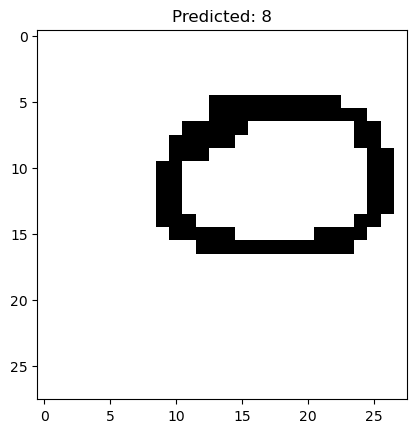

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_zero.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 16ms/step
Predicted digit: 2
Class 0: 0.00%
Class 1: 0.01%
Class 2: 99.99%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.00%


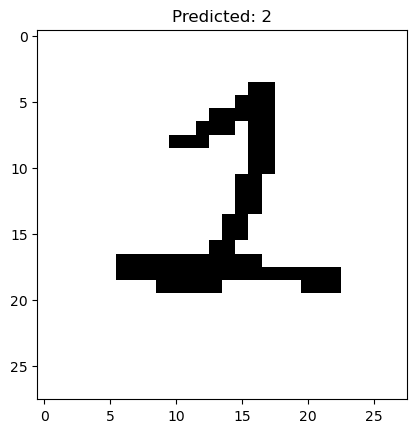

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_one.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 17ms/step
Predicted digit: 2
Class 0: 0.00%
Class 1: 0.00%
Class 2: 99.63%
Class 3: 0.36%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.01%
Class 9: 0.00%


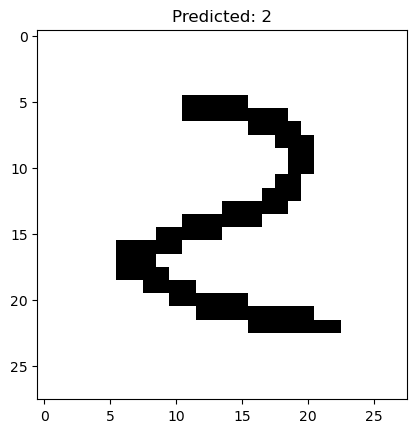

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_two.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 17ms/step
Predicted digit: 3
Class 0: 0.00%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 99.43%
Class 4: 0.00%
Class 5: 0.51%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 0.06%
Class 9: 0.00%


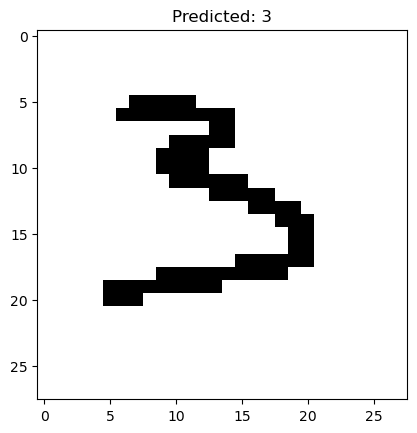

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_three.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 17ms/step
Predicted digit: 4
Class 0: 0.00%
Class 1: 27.15%
Class 2: 0.79%
Class 3: 0.06%
Class 4: 68.68%
Class 5: 0.21%
Class 6: 0.13%
Class 7: 2.38%
Class 8: 0.55%
Class 9: 0.07%


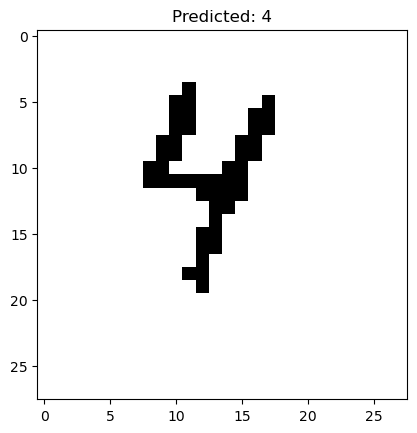

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и преобразование его в формат 28x28
img = image.load_img("C:\\Users\\drive\\Downloads\\my_four.png", color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)  # Преобразуем изображение в массив
img_array = np.expand_dims(img_array, axis=0)  # Расширяем размерность для батча
img_array = img_array / 255.0  # Нормализация

# Предсказание
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Вывод вероятностей для каждого класса
class_probabilities = predictions[0] * 100  # Переводим в проценты

# Отображаем результат
print(f"Predicted digit: {predicted_label}")

# Печатаем вероятности для всех классов
for i, prob in enumerate(class_probabilities):
    print(f"Class {i}: {prob:.2f}%")

# Отображаем изображение
plt.imshow(img_array[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}")
plt.show()


уже 3 картинки распознал корректно.

прогресс!

сохраняем

In [30]:
model.save('number_recognizer.keras')

# Программа

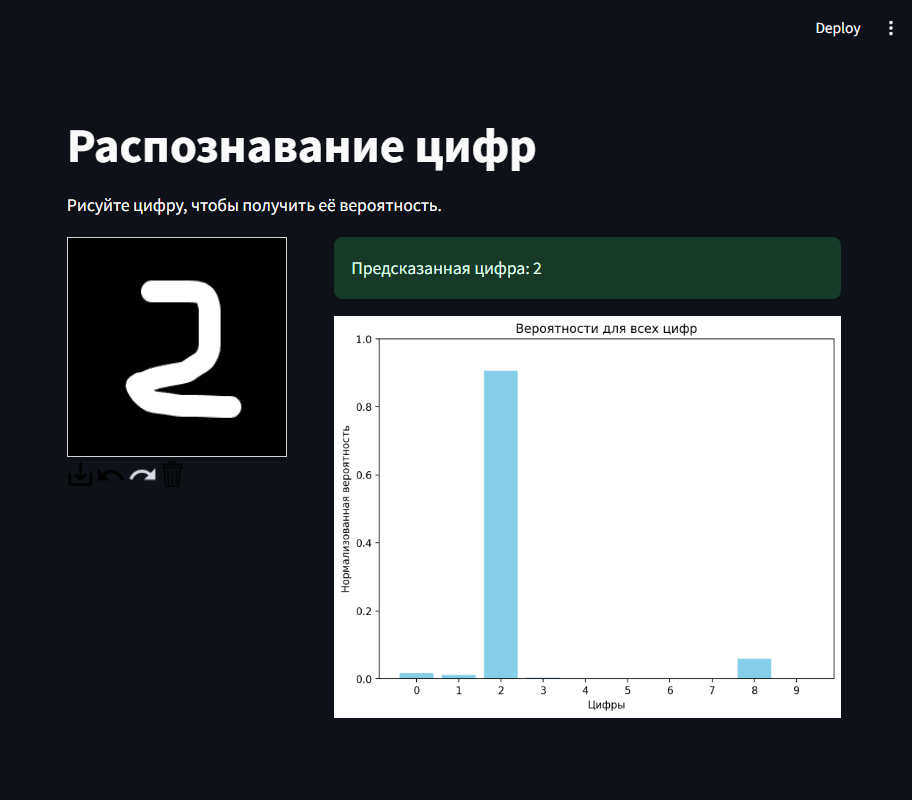

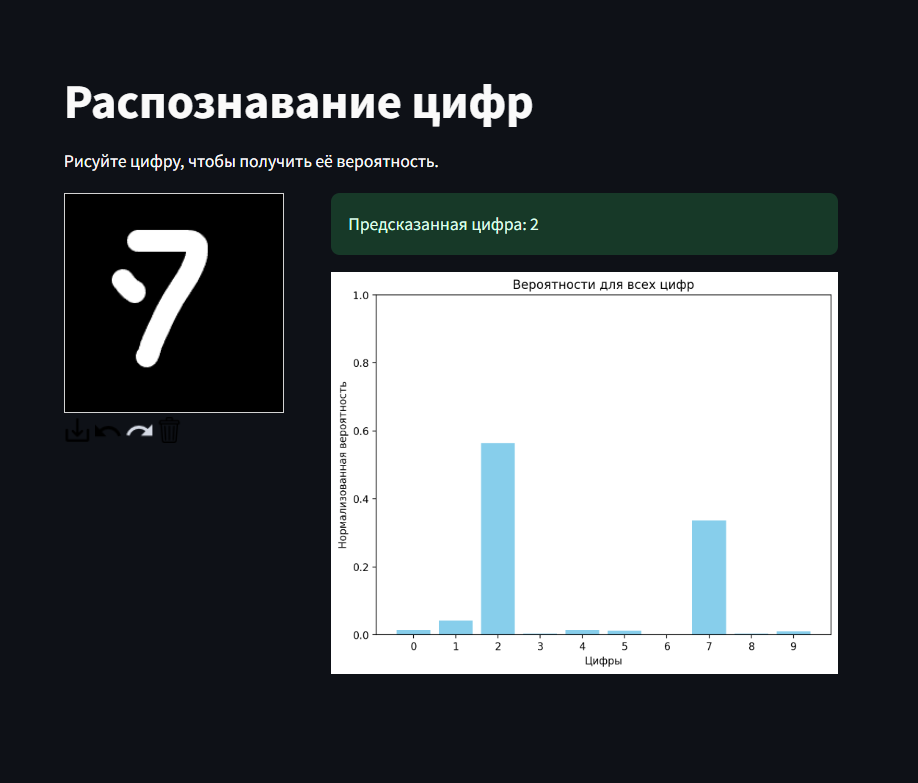

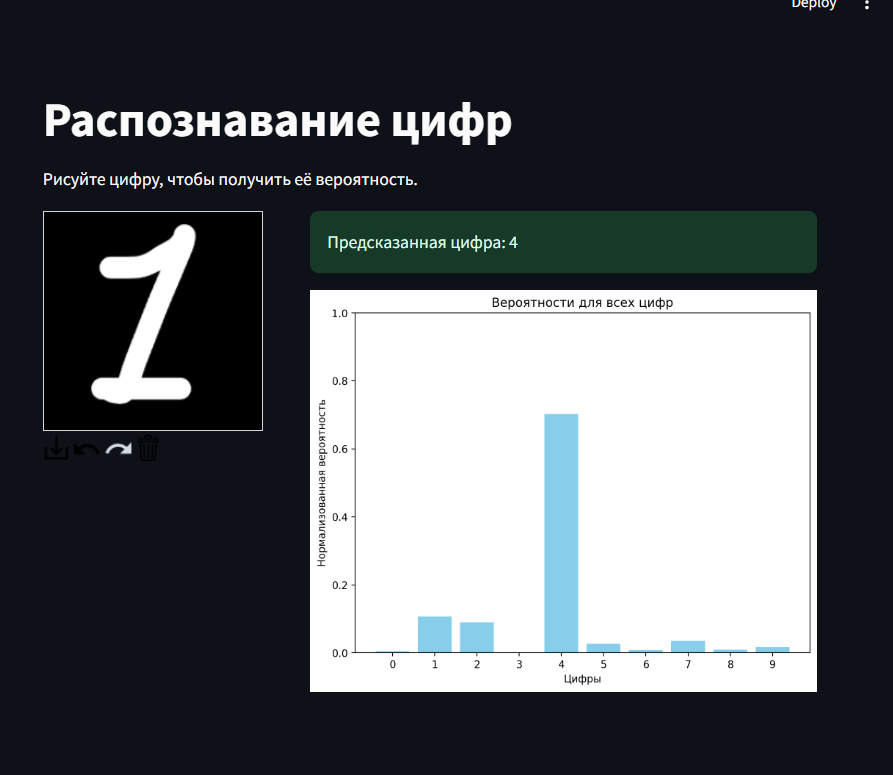

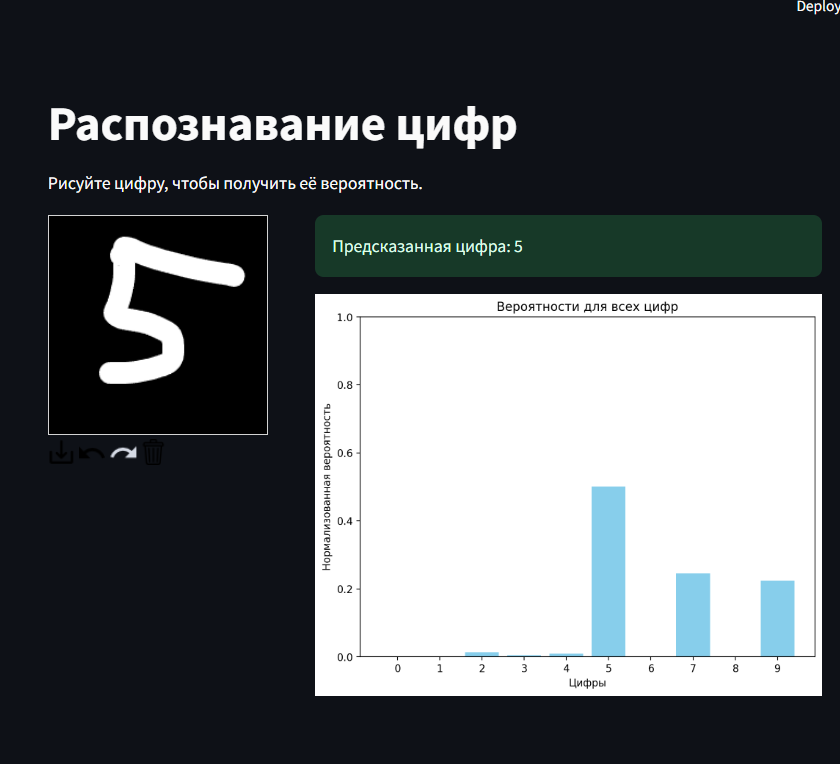